In [6]:
import sys
import pymysql
import pandas as pd
from pandas import Series, DataFrame
from PyQt5.QtWidgets import *

In [7]:
column_idx_lookup = {'seq': 0, 'node': 1, 'temp': 2, 'humi' : 3, 'date' : 4, 'time':5}

In [3]:
class MyWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setupUI()

    def setupUI(self):
        self.setGeometry(800, 200, 500, 500)
        self.setWindowTitle("DB Read Table")

        self.tableWidget = QTableWidget(self)
        self.tableWidget.resize(500, 500)
        self.tableWidget.setRowCount(200) # seq, node , temp, humi, date, time
        self.tableWidget.setColumnCount(6)
        self.tableWidget.setEditTriggers(QAbstractItemView.NoEditTriggers)
        
        self.setTableWidgetData()

    def setTableWidgetData(self):
        column_headers = ['seq', 'node', 'temp', 'humi', 'date', 'temp']
        self.tableWidget.setHorizontalHeaderLabels(column_headers)
        conn = pymysql.connect(host= 'localhost', user='root', password='1234', db='usn', charset='utf8')
        curs = conn.cursor(pymysql.cursors.DictCursor)
        curs.execute("""select * from usnnode""")
        rows = curs.fetchall()
        seq_list = []
        node_list = []
        temp_list = []
        humi_list = []
        date_list = []
        time_list = []
        db_dict = {}
        length = len(rows)
        for i in range(length):
            seq = rows[i]['seq']
            node = rows[i]['node']
            temp = rows[i]['temp']
            humi = rows[i]['humi']
            db_date = rows[i]['date']
            db_time = rows[i]['time']
            seq_list.append(seq)
            node_list.append(node)
            temp_list.append(temp)
            humi_list.append(humi)
            date_list.append(db_date)
            time_list.append(db_time)

        db_dict['seq'] = seq_list
        db_dict['node'] = node_list
        db_dict['temp'] = temp_list
        db_dict['humi'] = humi_list
        db_dict['date'] = date_list
        db_dict['time'] = time_list
        for k, v in db_dict.items():
            col = column_idx_lookup[k]
            for row, val in enumerate(v):
                item = QTableWidgetItem(val)
                self.tableWidget.setItem(row, col, item)
                
        self.tableWidget.resizeColumnsToContents()
        self.tableWidget.resizeRowsToContents()

In [4]:
if __name__ == "__main__":
    app = QApplication(sys.argv)
    mywindow = MyWindow()
    mywindow.show()
    app.exec_()

In [37]:
conn = pymysql.connect(host='localhost', user='root', password='1234', db='usn', charset='utf8')
curs = conn.cursor(pymysql.cursors.DictCursor)
curs.execute("""select * from usnnode""")
rows = curs.fetchall()

In [38]:
len(rows)

134

In [39]:
rows[0]['temp']

'23.45'

In [40]:
datetime = rows[1]['date'].split()
print(datetime)
db_dates = datetime[0]
db_times = datetime[1]

['2017-11-28', '16:11:22']


In [41]:
seq_list = []
node_list = []
temp_list = []
humi_list = []
date_list = []
time_list = []
db_dict = {}
length = len(rows)
for i in range(length):
    seq = rows[i]['seq']
    node = rows[i]['node']
    temp = rows[i]['temp']
    humi = rows[i]['humi']
    
    datetime = rows[i]['date'].split()
    db_date = datetime[0]
    db_time = datetime[1]
    
    seq_list.append(seq)
    node_list.append(node)
    temp_list.append(temp)
    humi_list.append(humi)
    date_list.append(db_date)
    time_list.append(db_time)
    
db_dict['seq'] = seq_list
db_dict['node'] = node_list
db_dict['temp'] = temp_list
db_dict['humi'] = humi_list
db_dict['date'] = date_list
db_dict['time'] = time_list

print(db_dict)

{'node': ['3', '3', '3', '3', '3', '3', '3', '3', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '3', '3', '1', '1', '3', '7', '7', '4', '4', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '2', '2', '2', '2', '2', '5', '5', '5', '5', '1', '1', '1', '9', '4', '4', '4', '4', '4', '5', '1'], 'time': ['16:11:08', '16:11:22', '16:11:58', '16:11:27', '16:11:43', '17:11:51', '17:11:04', '18:11:10', '22:11:55', '22:11:56', '22:11:35', '22:11:40', '22:11:37', '22:11:46', '23:11:06', '09:12:55', '23:12:42', '18:12:50', '12:12:10', '12:12:53', '14:12:51', '14:12:14', '14:12:01', '15:12:14', '15:12:55', '16:12:53'

In [42]:
temp_list = []
print(temp_list)

[]


In [43]:
column_idx_lookup = {'seq': 0, 'node': 1, 'temp': 2, 'humi' : 3, 'date' : 4, 'time':5}

In [44]:
for k, v in db_dict.items():
    col = column_idx_lookup[k]
    for row, val in enumerate(v): 
        # 이 함수는 순서가 있는 자료형
        #(리스트, 튜플, 문자열)을 입력으로 받아 인덱스 값을 포함하는 enumerate 객체를 리턴한다.
        print(val)
        print('row', row, 'col', col)

3
row 0 col 1
3
row 1 col 1
3
row 2 col 1
3
row 3 col 1
3
row 4 col 1
3
row 5 col 1
3
row 6 col 1
3
row 7 col 1
2
row 8 col 1
2
row 9 col 1
2
row 10 col 1
1
row 11 col 1
1
row 12 col 1
1
row 13 col 1
1
row 14 col 1
1
row 15 col 1
1
row 16 col 1
1
row 17 col 1
3
row 18 col 1
3
row 19 col 1
1
row 20 col 1
1
row 21 col 1
3
row 22 col 1
7
row 23 col 1
7
row 24 col 1
4
row 25 col 1
4
row 26 col 1
3
row 27 col 1
3
row 28 col 1
3
row 29 col 1
3
row 30 col 1
3
row 31 col 1
3
row 32 col 1
3
row 33 col 1
3
row 34 col 1
3
row 35 col 1
3
row 36 col 1
3
row 37 col 1
3
row 38 col 1
3
row 39 col 1
3
row 40 col 1
3
row 41 col 1
3
row 42 col 1
3
row 43 col 1
3
row 44 col 1
3
row 45 col 1
3
row 46 col 1
3
row 47 col 1
3
row 48 col 1
3
row 49 col 1
3
row 50 col 1
3
row 51 col 1
3
row 52 col 1
3
row 53 col 1
3
row 54 col 1
3
row 55 col 1
3
row 56 col 1
3
row 57 col 1
3
row 58 col 1
3
row 59 col 1
3
row 60 col 1
3
row 61 col 1
3
row 62 col 1
3
row 63 col 1
3
row 64 col 1
3
row 65 col 1
3
row 66 col 1
3
row

row 130 col 0
132
row 131 col 0
133
row 132 col 0
134
row 133 col 0
2017-11-28
row 0 col 4
2017-11-28
row 1 col 4
2017-11-28
row 2 col 4
2017-11-28
row 3 col 4
2017-11-28
row 4 col 4
2017-11-28
row 5 col 4
2017-11-28
row 6 col 4
2017-11-28
row 7 col 4
2017-11-30
row 8 col 4
2017-11-30
row 9 col 4
2017-11-30
row 10 col 4
2017-11-30
row 11 col 4
2017-11-30
row 12 col 4
2017-11-30
row 13 col 4
2017-11-30
row 14 col 4
2017-12-03
row 15 col 4
2017-12-03
row 16 col 4
2017-12-04
row 17 col 4
2017-12-05
row 18 col 4
2017-12-05
row 19 col 4
2017-12-05
row 20 col 4
2017-12-05
row 21 col 4
2017-12-05
row 22 col 4
2017-12-05
row 23 col 4
2017-12-05
row 24 col 4
2017-12-05
row 25 col 4
2017-12-05
row 26 col 4
2017-12-05
row 27 col 4
2017-12-05
row 28 col 4
2017-12-05
row 29 col 4
2017-12-05
row 30 col 4
2017-12-05
row 31 col 4
2017-12-05
row 32 col 4
2017-12-05
row 33 col 4
2017-12-05
row 34 col 4
2017-12-05
row 35 col 4
2017-12-05
row 36 col 4
2017-12-05
row 37 col 4
2017-12-05
row 38 col 4
2017-1

In [45]:
for k, v in db_dict.items():
    col = column_idx_lookup[k]

In [46]:
column_idx_lookup['seq']

0

In [47]:
db_dict['temp']

['23.45',
 '23.45',
 '23.45',
 '23.45',
 '23.45',
 '23.45',
 '23.45',
 '23.45',
 '32.44',
 '32.44',
 '32.44',
 '34.56',
 '34.56',
 '34.56',
 '34.56',
 '34.56',
 '34.56',
 '34.56',
 '34.56',
 '34.56',
 '23.12',
 '34.56',
 '22.1',
 '23.34',
 '23.34',
 '12.34',
 '12.34',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '23.56',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 '20.1',
 

In [48]:
for i, name in enumerate(db_dict['temp']):
    print(i, name)

0 23.45
1 23.45
2 23.45
3 23.45
4 23.45
5 23.45
6 23.45
7 23.45
8 32.44
9 32.44
10 32.44
11 34.56
12 34.56
13 34.56
14 34.56
15 34.56
16 34.56
17 34.56
18 34.56
19 34.56
20 23.12
21 34.56
22 22.1
23 23.34
24 23.34
25 12.34
26 12.34
27 20.1
28 20.1
29 20.1
30 20.1
31 20.1
32 20.1
33 20.1
34 20.1
35 20.1
36 20.1
37 20.1
38 20.1
39 20.1
40 20.1
41 20.1
42 20.1
43 20.1
44 20.1
45 20.1
46 20.1
47 20.1
48 20.1
49 20.1
50 20.1
51 20.1
52 20.1
53 20.1
54 20.1
55 20.1
56 20.1
57 20.1
58 20.1
59 20.1
60 20.1
61 20.1
62 20.1
63 20.1
64 20.1
65 20.1
66 20.1
67 20.1
68 20.1
69 20.1
70 20.1
71 20.1
72 20.1
73 20.1
74 20.1
75 20.1
76 20.1
77 20.1
78 23.56
79 20.1
80 20.1
81 20.1
82 20.1
83 20.1
84 20.1
85 20.1
86 20.1
87 20.1
88 20.1
89 20.1
90 20.1
91 20.1
92 20.1
93 20.1
94 20.1
95 20.1
96 20.1
97 20.1
98 20.1
99 20.1
100 20.1
101 20.1
102 20.1
103 20.1
104 20.1
105 20.1
106 20.1
107 20.1
108 20.1
109 20.1
110 20.1
111 20.1
112 20.1
113 20.1
114 32.34
115 32.34
116 32.34
117 32.34
118 32.34
119 23.

In [49]:
import matplotlib.pyplot as plt

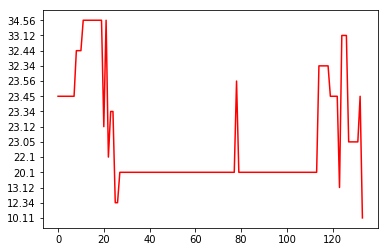

In [50]:
plt.plot(db_dict['temp'],'r')
plt.show()

In [51]:
conn.close()